## Analyze hu values pixel wise
- analyze three parts
    : **nodules, blood vessels, lung**
- read hu value from dicom file
- transfer dicom file from 02-18.dcm to 02-018.dcm in order to get the right sequence

### calculate the frequency of each hu value which is belong to **nodules**
- store the frequency which is normalized in variable **freq_norm**
- patient number format 001 ~ 200

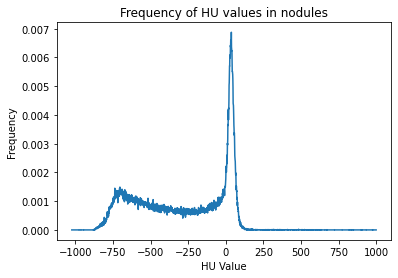

In [31]:
import numpy as np
import pydicom
from PIL import Image
import os
from matplotlib import pyplot as plt


# Set the path to the directory containing the DICOM files
dicom_path = "D:/lung_project/Section2/data/Hospital_data/dicom"

# Set the path to the directory containing the mask files
mask_path = "D:/lung_project/Section2/data/Lung_nodule/total/mask"

# Define a list of numbers to skip
skip_numbers = [2, 4, 5, 6, 9, 17, 30, 37, 67, 76, 79, 81, 98, 143, 152, 157, 169, 177, 182, 183]

# define the range of hu values to include in the plot
hu_min = -1024
hu_max = 1000

# create empty arrays to accumulate the frequency and hu value data
hu_data = np.arange(hu_min, hu_max + 1)
freq_total = np.zeros(hu_max - hu_min + 1)

for i in range(1, 61):

    # Skip the current iteration if the number is in the skip list
    if i in skip_numbers:
        continue

    # Get the file path of the current DICOM file
    dicom_file_path = os.path.join(dicom_path, str(i))
    dicom_file_path = os.path.join(dicom_file_path, str(os.listdir(dicom_file_path)[0]))

    dcm_files = sorted([f for f in os.listdir(dicom_file_path) if f.endswith('.dcm')])

    # Get the file path of the current mask file
    mask_file_path = os.path.join(mask_path, str(i).zfill(3))
    mask_files = sorted([f for f in os.listdir(mask_file_path)])
    
    for dcm_file, mask_file in zip(dcm_files, mask_files):
    
        # Load the DICOM file
        dcm = pydicom.dcmread(os.path.join(dicom_file_path, dcm_file))

        # Extract the pixel array and convert to HU values
        pixel_array = dcm.pixel_array
        slope = dcm.RescaleSlope
        intercept = dcm.RescaleIntercept
        hu_values = slope * pixel_array + intercept
        
        # Load the PNG mask file using NumPy
        mask = np.array(Image.open(os.path.join(mask_file_path, mask_file)).convert('L'), dtype=np.uint8)
        
        # apply the mask to the hu values and flatten the array
        hu_values_masked = hu_values[mask > 0]
        
        # calculate the frequency of each hu value and accumulate the data
        freq, _ = np.histogram(hu_values_masked, bins=np.arange(hu_min - 1, hu_max + 1))
        freq_total += freq

# Calculate the sum of frequency
total_freq = np.sum(freq_total)

# Calculate the normalized frequency
freq_norm = freq_total / total_freq

# plot the result
plt.plot(hu_data, freq_norm)
plt.xlabel("HU Value")
plt.ylabel("Frequency")
plt.title('Frequency of HU values in nodules')
plt.show()


### **blood vessel** pixel wise analysis
- store the frequency which is normalized in variable **vessel_freq_norm**
- blood vessel only has **60** patients as sample

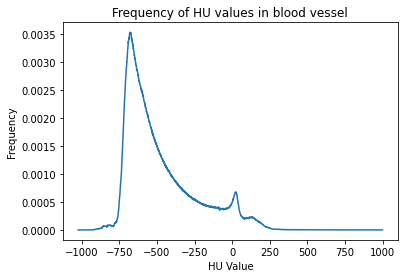

In [18]:
# Set the path to the directory containing the mask files
mask_path = "D:/lung_project/Section2/data/Blood_vessel_recognition"

# create empty arrays to accumulate the frequency and hu value data
vessel_freq_total = np.zeros(hu_max - hu_min + 1)

for i in range(1, 61):

    # Skip the current iteration if the number is in the skip list
    if i in skip_numbers:
        continue

    # Get the file path of the current DICOM file
    dicom_file_path = os.path.join(dicom_path, str(i))
    dicom_file_path = os.path.join(dicom_file_path, str(os.listdir(dicom_file_path)[0]))

    dcm_files = sorted([f for f in os.listdir(dicom_file_path) if f.endswith('.dcm')])

    # Get the file path of the current mask file
    mask_file_path = os.path.join(mask_path, str(i))
    mask_files = sorted([f for f in os.listdir(mask_file_path)])
    
    for dcm_file, mask_file in zip(dcm_files, mask_files):
    
        # Load the DICOM file
        dcm = pydicom.dcmread(os.path.join(dicom_file_path, dcm_file))

        # Extract the pixel array and convert to HU values
        pixel_array = dcm.pixel_array
        slope = dcm.RescaleSlope
        intercept = dcm.RescaleIntercept
        hu_values = slope * pixel_array + intercept
        
        # Load the PNG mask file using NumPy
        mask = np.array(Image.open(os.path.join(mask_file_path, mask_file)).convert('L'), dtype=np.uint8)
        
        # apply the mask to the hu values and flatten the array
        hu_values_masked = hu_values[mask > 0]
        
        # calculate the frequency of each hu value and accumulate the data
        freq, _ = np.histogram(hu_values_masked, bins=np.arange(hu_min - 1, hu_max + 1))
        vessel_freq_total += freq

# Calculate the sum of frequency
vessel_total_freq = np.sum(vessel_freq_total)

# Calculate the normalized frequency
vessel_freq_norm = vessel_freq_total / vessel_total_freq

# plot the result
plt.plot(hu_data, vessel_freq_norm)
plt.xlabel("HU Value")
plt.ylabel("Frequency")
plt.title('Frequency of HU values in blood vessel')
plt.show()


### **lung**
- the range of lung is depends on vessels and nodules, hence it also has 60 patients as sample.
- 鎖骨部分尚未剔除

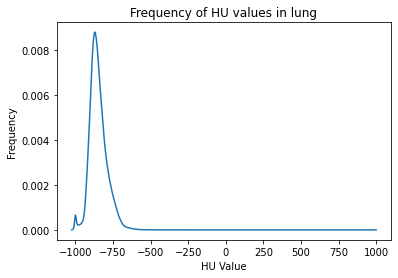

In [29]:
# Set the path to the directory containing the mask files
lung_mask_path = "D:/lung_project/Section2/data/Hospital_data/lung_mask"
nodule_mask_path = "D:/lung_project/Section2/data/Lung_nodule/total/mask"
vessel_mask_path = "D:/lung_project/Section2/data/Blood_vessel_recognition"


# create empty arrays to accumulate the frequency and hu value data
lung_freq_total = np.zeros(hu_max - hu_min + 1)

for i in range(1, 61):

    # Skip the current iteration if the number is in the skip list
    if i in skip_numbers:
        continue

    # Get the file path of the current DICOM file
    dicom_file_path = os.path.join(dicom_path, str(i))
    dicom_file_path = os.path.join(dicom_file_path, str(os.listdir(dicom_file_path)[0]))

    dcm_files = sorted([f for f in os.listdir(dicom_file_path) if f.endswith('.dcm')])

    # Get the file path of the current mask file
    lung_mask_file_path = os.path.join(lung_mask_path, str(i))
    lung_mask_files = sorted([f for f in os.listdir(lung_mask_file_path)])

    nodule_mask_file_path = os.path.join(nodule_mask_path, str(i).zfill(3))
    nodule_mask_files = sorted([f for f in os.listdir(nodule_mask_file_path)])

    vessel_mask_file_path = os.path.join(vessel_mask_path, str(i))
    vessel_mask_files = sorted([f for f in os.listdir(vessel_mask_file_path)])

    
    for dcm_file, lung_mask_file, nodule_mask_file, vessel_mask_file in zip(dcm_files, lung_mask_files, nodule_mask_files, vessel_mask_files):
    
        # Load the DICOM file
        dcm = pydicom.dcmread(os.path.join(dicom_file_path, dcm_file))

        # Extract the pixel array and convert to HU values
        pixel_array = dcm.pixel_array
        slope = dcm.RescaleSlope
        intercept = dcm.RescaleIntercept
        hu_values = slope * pixel_array + intercept
        
        # Load the mask file using NumPy
        lung_mask = np.array(Image.open(os.path.join(lung_mask_file_path, lung_mask_file)).convert('L'), dtype=np.uint8)
        nodule_mask = np.array(Image.open(os.path.join(nodule_mask_file_path, nodule_mask_file)).convert('L'), dtype=np.uint8)
        vessel_mask = np.array(Image.open(os.path.join(vessel_mask_file_path, vessel_mask_file)).convert('L'), dtype=np.uint8)

        # apply the mask to the hu values and flatten the array
        nv_mask = np.logical_or(nodule_mask == 255, vessel_mask == 255)
        final_mask = np.logical_and(lung_mask == 255, nv_mask == False)
        hu_values_masked = hu_values[final_mask]

        # calculate the frequency of each hu value and accumulate the data
        freq, _ = np.histogram(hu_values_masked, bins=np.arange(hu_min - 1, hu_max + 1))
        lung_freq_total += freq

# Calculate the sum of frequency
lung_total_freq = np.sum(lung_freq_total)

# Calculate the normalized frequency
lung_freq_norm = lung_freq_total / lung_total_freq

# plot the result
plt.plot(hu_data, lung_freq_norm)
plt.xlabel("HU Value")
plt.ylabel("Frequency")
plt.title('Frequency of HU values in lung')
plt.show()


## Final result (Combined)

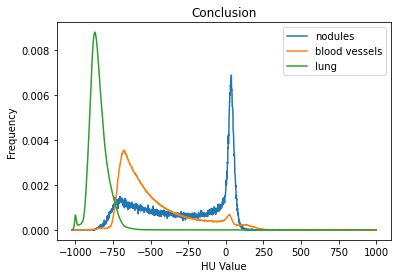

In [32]:
plt.plot(hu_data, freq_norm, label = 'nodules')
plt.plot(hu_data, vessel_freq_norm, label = 'blood vessels')
plt.plot(hu_data, lung_freq_norm, label = 'lung')
plt.xlabel("HU Value")
plt.ylabel("Frequency")
plt.title('Conclusion')
plt.legend()
plt.show()